# EDA 1
## Initial Exploration with first cleaned data set
## Exploration of second cleaned data set on EDA 2
## Data grouped by team/year on EDA 3
## 
---
## 

### Remaining Bogus data from 2012, 2013
#### based on completion % > 100
#### AUDL site doesn't even provide stats for these seasons

In [198]:
print(data.shape)
data = data[data.date.dt.year > 2013]
print('removed 2012,2013 seasons')
print(data.shape)

(1490, 34)
removed 2012,2013 seasons
(1325, 34)


### Cleaning Artifacts: `-1`
### replace -1 values with None
#### will change dtype of columns with empty values from int to float

In [199]:
data.where(data != -1, np.nan, inplace=True)

In [205]:
data.isnull().sum().sum()/(data.shape[0]*data.shape[1])

0.17642619311875693

## Step 1 - Establish Success Criteria
#### Add columns for home win and home margin
 - strict wins, losses and ties will be `False`
#### everything in terms of home team should give easy start for evaluation

In [3]:
data.head()

,date,week,home,away,home_score,away_score,away_completions,away_throws,away_hucks_completed,away_hucks,...,home_blocks,home_turnovers,home_o_scores,home_o_points,home_o_possessions,home_d_scores,home_d_points,home_d_possessions,home_rz_scores,home_rz_possessions
1891,2012-04-14 19:00:00+00:00,1,Revolution,Mechanix,19,17,-1,-1,-1,-1,...,11,34,-1,-1,-1,-1,-1,-1,-1,-1
1894,2012-04-14 19:00:00+00:00,1,Rampage,Constitution,23,29,-1,-1,-1,-1,...,9,28,-1,-1,-1,-1,-1,-1,-1,-1
1893,2012-04-14 19:00:00+00:00,1,Spinners,Dragons,26,14,180,190,-1,-1,...,18,24,-1,-1,-1,-1,-1,-1,-1,-1
1892,2012-04-14 19:00:00+00:00,1,Cranes,AlleyCats,22,21,176,189,-1,-1,...,10,21,-1,-1,-1,-1,-1,-1,-1,-1
1897,2012-04-21 19:00:00+00:00,2,Spinners,Constitution,22,16,197,203,-1,-1,...,13,23,-1,-1,-1,-1,-1,-1,-1,-1


In [206]:
data.loc[:,'home_win'] = data.home_score > data.away_score

In [207]:
data.loc[:,'home_margin'] = data.home_score - data.away_score

<Axes: xlabel='home_margin'>

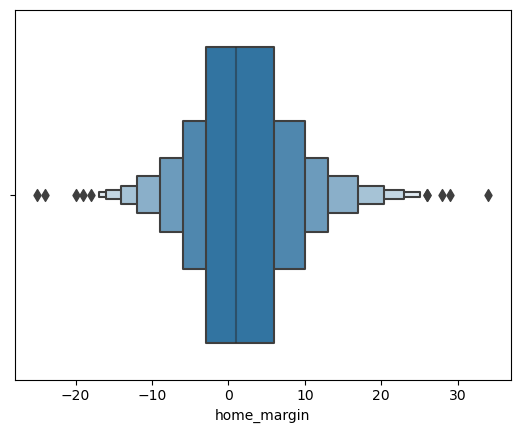

In [208]:
sns.boxenplot(x=data.home_margin)

In [209]:
data[np.abs(data.home_margin) > 20]\
    .sort_values('home_margin', ascending=False)[['date','week','home','away','home_margin']]

,date,week,home,away,home_margin
1725,2015-07-17 19:00:00+00:00,15,Wind Chill,Mechanix,34
2258,2018-05-13 12:00:00+00:00,7,Radicals,Mechanix,29
2132,2014-06-07 19:00:00+00:00,9,Riptide,Lions,28
2157,2014-06-27 19:00:00+00:00,12,Wind Chill,Mechanix,26
1739,2015-07-10 19:00:00+00:00,14,Thunderbirds,Mechanix,26
2163,2014-06-28 19:00:00+00:00,12,Spiders,Lions,25
2179,2014-07-19 19:00:00+00:00,playoffs,Rush,Breeze,25
2135,2014-06-08 19:00:00+00:00,9,Cascades,Lions,24
1800,2015-05-30 19:00:00+00:00,8,Thunderbirds,Mechanix,24
2489,2019-07-14 12:00:00+00:00,15,Radicals,Mechanix,24


In [210]:
data.corr(numeric_only=True).loc[['home_margin','home_win'],:].style\
        .background_gradient(cmap = 'PiYG', axis=1)\
        .format(formatter="{:.3f}")

,home_score,away_score,away_completions,away_throws,away_hucks_completed,away_hucks,away_blocks,away_turnovers,away_o_scores,away_o_points,away_o_possessions,away_d_scores,away_d_points,away_d_possessions,away_rz_scores,away_rz_possessions,home_completions,home_throws,home_hucks_completed,home_hucks,home_blocks,home_turnovers,home_o_scores,home_o_points,home_o_possessions,home_d_scores,home_d_points,home_d_possessions,home_rz_scores,home_rz_possessions,home_win,home_margin
home_margin,0.727,-0.695,-0.025,0.058,-0.165,0.043,-0.432,0.518,-0.155,0.704,0.702,-0.809,-0.678,-0.692,-0.645,-0.508,-0.036,-0.095,0.191,0.036,0.552,-0.390,-0.046,-0.682,-0.697,0.897,0.718,0.760,0.673,0.596,0.766,1.000
home_win,0.558,-0.530,-0.030,0.027,-0.118,0.054,-0.392,0.356,-0.068,0.546,0.523,-0.675,-0.522,-0.587,-0.521,-0.428,0.002,-0.053,0.117,-0.029,0.399,-0.364,0.011,-0.521,-0.549,0.649,0.549,0.543,0.547,0.485,1.000,0.766


## Step 2 - Add Derived Stats
#### standard things like completion %'s
#### other stuff
#### ideas:
 - completions / throws
 - hucks_completed / hucks
 - blocks / opponent throws
 - O scores per point
 - O possessions per O score
 - D possessions per O score
 - D possessions per D score
   


In [102]:
data.home_d_scores.describe()

count    1324.000000
mean        7.476586
std         4.566654
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        34.000000
Name: home_d_scores, dtype: float64

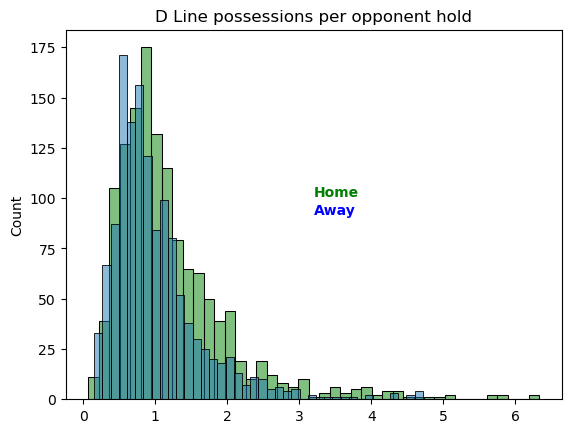

In [211]:
sns.histplot(x=data.home_d_possessions/data.away_o_scores, color='g', alpha=0.5)
sns.histplot(x=data.away_d_possessions/data.home_o_scores, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line possessions per opponent hold')
plt.show()

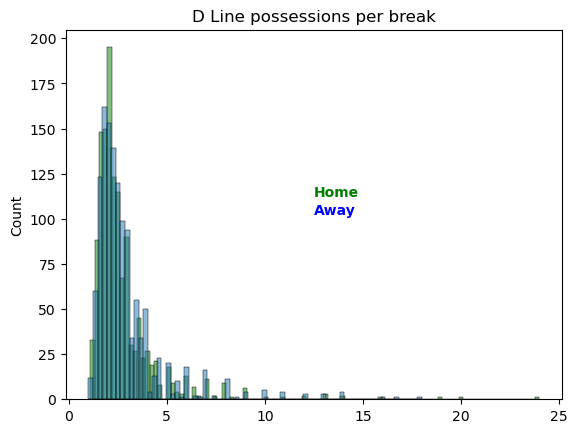

In [212]:
sns.histplot(x=data.home_d_possessions/data.home_d_scores, color='g', alpha=0.5)
sns.histplot(x=data.away_d_possessions/data.away_d_scores, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line possessions per break')
plt.show()

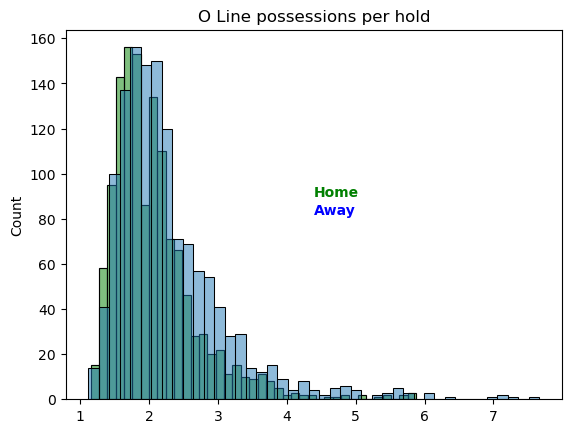

In [213]:
sns.histplot(x=data.home_o_possessions/data.home_o_scores, color='g', alpha=0.5)
sns.histplot(x=data.away_o_possessions/data.away_o_scores, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('O Line possessions per hold')
plt.show()

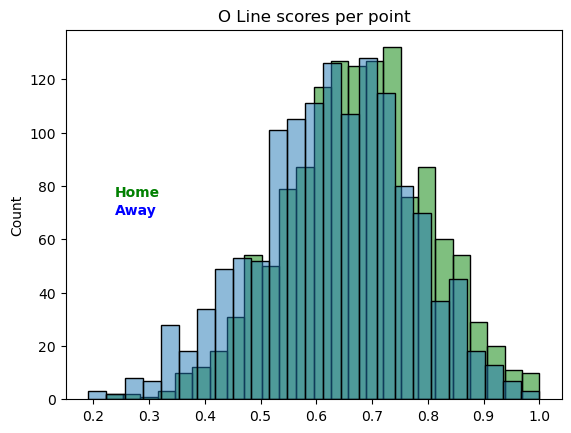

In [214]:
sns.histplot(x=data.home_o_scores/data.home_o_points, color='g', alpha=0.5)
sns.histplot(x=data.away_o_scores/data.away_o_points, alpha=0.5)

tx = 0.4*sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')


plt.title('O Line scores per point')
plt.show()

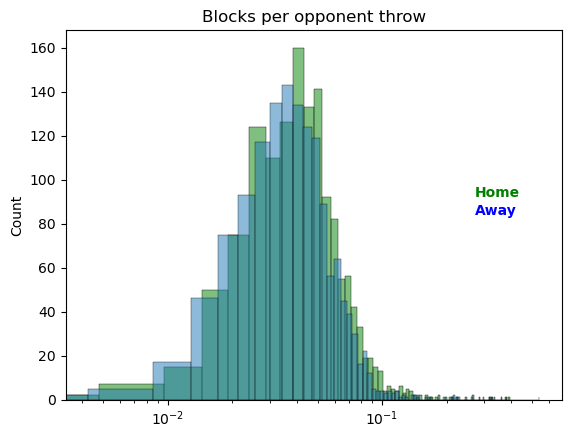

In [143]:
sns.histplot(x=data.home_blocks/data.away_throws, color='g', alpha=0.5)
sns.histplot(x=data.away_blocks/data.home_throws, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('Blocks per opponent throw')
plt.xscale('log')
plt.show()

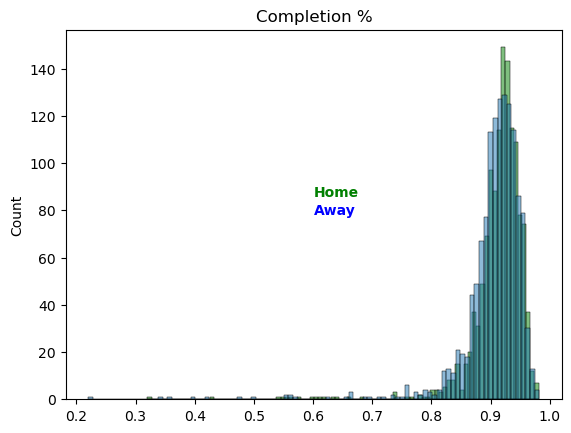

In [215]:
sns.histplot(x=data.home_completions/data.home_throws, color='g', alpha=0.5)
sns.histplot(x=data.away_completions/data.away_throws, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('Completion %')
#plt.xscale('log')
plt.show()

In [149]:
throw_cols = ['date','home','home_throws','home_completions','away','away_throws', 'away_completions']

In [216]:
data[(data.home_completions/data.home_throws>=1) | (data.away_completions/data.away_throws>=1)][throw_cols]

,date,home,home_throws,home_completions,away,away_throws,away_completions


In [171]:
data.isnull().groupby(data.date.dt.year).sum().T

date,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
date,0,0,0,0,0,0,0,0,0,0,0
week,0,0,0,0,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0,0,0,0,0
away,0,0,0,0,0,0,0,0,0,0,0
home_score,0,0,0,0,0,0,0,0,0,0,0
away_score,0,0,0,0,0,0,0,0,0,0,0
away_completions,34,17,2,2,2,0,0,0,0,0,0
away_throws,34,17,2,2,2,0,0,0,0,0,0
away_hucks_completed,64,101,126,185,193,179,171,132,0,0,0
away_hucks,64,101,126,185,193,179,171,132,0,0,0


In [177]:
pd.DataFrame(data.value_counts(data.date.dt.year)).sort_index().columns

RangeIndex(start=0, stop=1, step=1)

In [180]:
data.value_counts(data.date.dt.year).sort_index()

date
2012     64
2013    101
2014    126
2015    185
2016    193
2017    179
2018    171
2019    135
2021    134
2022    161
2023     41
dtype: int64

## DUMB STYLING THING

In [36]:
data[np.abs(data.home_margin) > 20]\
    .sort_values('home_margin', ascending=False)[['date','week','home','away','home_margin']]\
    .style\
        .apply(highlight_win, axis=1, subset=[')

,date,week,home,away,home_margin
1725,2015-07-17 19:00:00+00:00,15,Wind Chill,Mechanix,34
2258,2018-05-13 12:00:00+00:00,7,Radicals,Mechanix,29
2132,2014-06-07 19:00:00+00:00,9,Riptide,Lions,28
1739,2015-07-10 19:00:00+00:00,14,Thunderbirds,Mechanix,26
2157,2014-06-27 19:00:00+00:00,12,Wind Chill,Mechanix,26
2163,2014-06-28 19:00:00+00:00,12,Spiders,Lions,25
2179,2014-07-19 19:00:00+00:00,playoffs,Rush,Breeze,25
2489,2019-07-14 12:00:00+00:00,15,Radicals,Mechanix,24
2135,2014-06-08 19:00:00+00:00,9,Cascades,Lions,24
1800,2015-05-30 19:00:00+00:00,8,Thunderbirds,Mechanix,24


In [38]:
def highlight_win(s):
    x = (s, winner)
    winner = s.home if s.home_margin > 0 else s.away
    return np.where(s.values == winner, 'background-color:lime-green', '')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
teams = pd.read_parquet('data/team_info.parquet')
data = pd.read_parquet('data/game_stats_clean1.parquet')